# Allan Variance Analysis

In [38]:
import bagpy
from bagpy import bagreader
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sea

imu_reader_location_c = bagreader('../data/LocationC.bag')


[INFO]  Data folder ../data/LocationC already exists. Not creating.


In [39]:
imu_reader_location_c.topic_table

,Topics,Types,Message Count,Frequency
0,/rosout,rosgraph_msgs/Log,1,NaN
1,/vectornav,rospy_tutorials/HeaderString,719907,40.007097


In [40]:
imu_reader_location_c_msg = imu_reader_location_c.message_by_topic('/vectornav')

In [43]:
imu_reader_location_c_data = pd.read_csv(imu_reader_location_c_msg)
imu_reader_location_c_data.head()

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,data
0,1.676784e+09,1,1676784144,820079326,we don't need no frame id,"$VNYMR,+178.590,+000.595,+056.509,-00.2200,+00..."
1,1.676784e+09,2,1676784144,845151901,we don't need no frame id,"$VNYMR,+178.590,+000.595,+056.511,-00.2209,+00..."
2,1.676784e+09,3,1676784144,870180845,we don't need no frame id,"$VNYMR,+178.590,+000.595,+056.510,-00.2190,+00..."
3,1.676784e+09,4,1676784144,895199298,we don't need no frame id,"$VNYMR,+178.587,+000.594,+056.509,-00.2199,+00..."
4,1.676784e+09,5,1676784144,920007228,we don't need no frame id,"$VNYMR,+178.587,+000.594,+056.511,-00.2219,+00..."


### Data Preprocessing

In [44]:
print(imu_reader_location_c_data['data'])

0         $VNYMR,+178.590,+000.595,+056.509,-00.2200,+00...
1         $VNYMR,+178.590,+000.595,+056.511,-00.2209,+00...
2         $VNYMR,+178.590,+000.595,+056.510,-00.2190,+00...
3         $VNYMR,+178.587,+000.594,+056.509,-00.2199,+00...
4         $VNYMR,+178.587,+000.594,+056.511,-00.2219,+00...
                                ...                        
719902    $VNYMR,+179.091,+000.724,+057.376,-00.2218,+00...
719903    $VNYMR,+179.089,+000.724,+057.375,-00.2228,+00...
719904    $VNYMR,+179.089,+000.723,+057.376,-00.2237,+00...
719905    $VNYMR,+179.091,+000.723,+057.377,-00.2246,+00...
719906    $VNYMR,+179.090,+000.724,+057.376,-00.2247,+00...
Name: data, Length: 719907, dtype: object


In [45]:
split_imu_data = imu_reader_location_c_data['data']
print(split_imu_data)

0         $VNYMR,+178.590,+000.595,+056.509,-00.2200,+00...
1         $VNYMR,+178.590,+000.595,+056.511,-00.2209,+00...
2         $VNYMR,+178.590,+000.595,+056.510,-00.2190,+00...
3         $VNYMR,+178.587,+000.594,+056.509,-00.2199,+00...
4         $VNYMR,+178.587,+000.594,+056.511,-00.2219,+00...
                                ...                        
719902    $VNYMR,+179.091,+000.724,+057.376,-00.2218,+00...
719903    $VNYMR,+179.089,+000.724,+057.375,-00.2228,+00...
719904    $VNYMR,+179.089,+000.723,+057.376,-00.2237,+00...
719905    $VNYMR,+179.091,+000.723,+057.377,-00.2246,+00...
719906    $VNYMR,+179.090,+000.724,+057.376,-00.2247,+00...
Name: data, Length: 719907, dtype: object


In [46]:

split_imu_data = split_imu_data.str.split(",", expand=True)

In [47]:
split_imu_data.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,$VNYMR,+178.590,+000.595,+056.509,-00.2200,+00.3706,+00.2549,+00.047,-08.227,-05.439,+00.000276,-00.000666,-00.000012*65\r\n
1,$VNYMR,+178.590,+000.595,+056.511,-00.2209,+00.3716,+00.2515,+00.094,-08.202,-05.439,+00.002981,-00.000320,+00.000013*65\r\n
2,$VNYMR,+178.590,+000.595,+056.510,-00.2190,+00.3746,+00.2571,+00.128,-08.225,-05.437,-00.002424,+00.001153,-00.001076*6C\r\n
3,$VNYMR,+178.587,+000.594,+056.509,-00.2199,+00.3746,+00.2548,+00.109,-08.235,-05.437,+00.000199,+00.000370,+00.000659*6B\r\n
4,$VNYMR,+178.587,+000.594,+056.511,-00.2219,+00.3707,+00.2537,+00.083,-08.205,-05.416,+00.000841,-00.000433,-00.000041*64\r\n
5,$VNYMR,+178.584,+000.595,+056.509,-00.2208,+00.3796,+00.2547,+00.074,-08.190,-05.451,-00.001410,-00.000870,-00.001292*6D\r\n
6,$VNYMR,+178.587,+000.594,+056.509,-00.2171,+00.3755,+00.2549,+00.128,-08.228,-05.454,+00.002220,+00.000623,-00.000143*6E\r\n
7,$VNYMR,+178.586,+000.594,+056.510,-00.2218,+00.3746,+00.2558,+00.136,-08.198,-05.419,-00.000241,+00.000253,+00.000339*6E\r\n
8,$VNYMR,+178.584,+000.595,+056.508,-00.2209,+00.3756,+00.2537,+00.071,-08.209,-05.444,+00.000111,-00.000455,-00.000672*67\r\n
9,$VNYMR,+178.580,+000.595,+056.510,-00.2209,+00.3716,+00.2526,+00.081,-08.194,-05.468,+00.001042,+00.000269,+00.000363*62\r\n


In [48]:
gyro_data = split_imu_data[[10,11,12]]
gyro_data.head(10)

,10,11,12
0,+00.000276,-00.000666,-00.000012*65\r\n
1,+00.002981,-00.000320,+00.000013*65\r\n
2,-00.002424,+00.001153,-00.001076*6C\r\n
3,+00.000199,+00.000370,+00.000659*6B\r\n
4,+00.000841,-00.000433,-00.000041*64\r\n
5,-00.001410,-00.000870,-00.001292*6D\r\n
6,+00.002220,+00.000623,-00.000143*6E\r\n
7,-00.000241,+00.000253,+00.000339*6E\r\n
8,+00.000111,-00.000455,-00.000672*67\r\n
9,+00.001042,+00.000269,+00.000363*62\r\n


In [49]:
column_names = ['Angular_rate_x', 'Angular_rate_y', 'Angular_rate_z']
gyro_data.columns = column_names
gyro_data.head(10)

,Angular_rate_x,Angular_rate_y,Angular_rate_z
0,+00.000276,-00.000666,-00.000012*65\r\n
1,+00.002981,-00.000320,+00.000013*65\r\n
2,-00.002424,+00.001153,-00.001076*6C\r\n
3,+00.000199,+00.000370,+00.000659*6B\r\n
4,+00.000841,-00.000433,-00.000041*64\r\n
5,-00.001410,-00.000870,-00.001292*6D\r\n
6,+00.002220,+00.000623,-00.000143*6E\r\n
7,-00.000241,+00.000253,+00.000339*6E\r\n
8,+00.000111,-00.000455,-00.000672*67\r\n
9,+00.001042,+00.000269,+00.000363*62\r\n


### Error Analysis

In [51]:
gyro_data.head()

,Angular_rate_x,Angular_rate_y,Angular_rate_z
0,+00.000276,-00.000666,-00.000012*65\r\n
1,+00.002981,-00.000320,+00.000013*65\r\n
2,-00.002424,+00.001153,-00.001076*6C\r\n
3,+00.000199,+00.000370,+00.000659*6B\r\n
4,+00.000841,-00.000433,-00.000041*64\r\n


In [52]:
gyro_data = pd.DataFrame(gyro_data)
gyro_data.head()

,Angular_rate_x,Angular_rate_y,Angular_rate_z
0,+00.000276,-00.000666,-00.000012*65\r\n
1,+00.002981,-00.000320,+00.000013*65\r\n
2,-00.002424,+00.001153,-00.001076*6C\r\n
3,+00.000199,+00.000370,+00.000659*6B\r\n
4,+00.000841,-00.000433,-00.000041*64\r\n


In [64]:
gyro_data['Angular_rate_z'] = gyro_data['Angular_rate_z'].str.split("*",expand=True)
gyro_data.head()


,Angular_rate_x,Angular_rate_y,Angular_rate_z
0,0.000276,-0.000666,-00.000012\n
1,0.002981,-0.000320,+00.000013\n
2,-0.002424,0.001153,-00.001076\n
3,0.000199,0.000370,+00.000659\n
4,0.000841,-0.000433,-00.000041\n


In [67]:
gyro_data['Angular_rate_z'] = gyro_data['Angular_rate_z'].str.strip()
gyro_data.head()

,Angular_rate_x,Angular_rate_y,Angular_rate_z
0,0.000276,-0.000666,-00.000012
1,0.002981,-0.000320,+00.000013
2,-0.002424,0.001153,-00.001076
3,0.000199,0.000370,+00.000659
4,0.000841,-0.000433,-00.000041


In [69]:
gyro_data['Angular_rate_x'] = gyro_data['Angular_rate_x'].astype(float)
gyro_data['Angular_rate_y'] = gyro_data['Angular_rate_y'].astype(float)

gyro_data.head()

,Angular_rate_x,Angular_rate_y,Angular_rate_z
0,0.000276,-0.000666,-00.000012
1,0.002981,-0.000320,+00.000013
2,-0.002424,0.001153,-00.001076
3,0.000199,0.000370,+00.000659
4,0.000841,-0.000433,-00.000041


In [73]:
gyro_data = gyro_data[gyro_data['Angular_rate_z'].str.split('.').str.len() <= 2]  # Check for at most 1 decimal point


In [75]:
gyro_data['Angular_rate_z'] = gyro_data['Angular_rate_z'].astype(float)


In [76]:
gyro_data.head()

,Angular_rate_x,Angular_rate_y,Angular_rate_z
0,0.000276,-0.000666,-0.000012
1,0.002981,-0.000320,0.000013
2,-0.002424,0.001153,-0.001076
3,0.000199,0.000370,0.000659
4,0.000841,-0.000433,-0.000041


In [77]:
gyro_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 719859 entries, 0 to 719906
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Angular_rate_x  719859 non-null  float64
 1   Angular_rate_y  719859 non-null  float64
 2   Angular_rate_z  719859 non-null  float64
dtypes: float64(3)
memory usage: 22.0 MB


In [78]:
gyro_data['Angular_rate_z'].count()

719859

In [83]:
gyro_data['Angular_rate_x'] = np.degrees(gyro_data['Angular_rate_x'])
gyro_data['Angular_rate_y'] = np.degrees(gyro_data['Angular_rate_y'])
gyro_data['Angular_rate_z'] = np.degrees(gyro_data['Angular_rate_z'])

gyro_data.head()

,Angular_rate_x,Angular_rate_y,Angular_rate_z
0,51.913102,-125.268572,-2.257091
1,560.699118,-60.189104,2.445182
2,-455.932460,216.868864,-202.385861
3,37.430099,69.593651,123.951935
4,158.184488,-81.443381,-7.711729


## Calculating Allan variance using Allantools 

In [84]:
import allantools

#calculating for gyro-x
Allan_dev_x = allantools.oadev(gyro_data['Angular_rate_x'], taus = 'all')

In [86]:
print(Allan_dev_x)

(array([1.00000e+00, 2.00000e+00, 3.00000e+00, ..., 3.59926e+05,
       3.59927e+05, 3.59928e+05]), array([7.77356032e+02, 2.42118354e+02, 1.85214866e+02, ...,
       1.22270960e-03, 5.92110250e-04, 1.14699036e-03]), array([9.16213859e-01, 2.85367953e-01, 2.18300099e-01, ...,
       4.62140788e-04, 2.64799754e-04, 6.62215193e-04]), array([7.19857e+05, 7.19855e+05, 7.19853e+05, ..., 7.00000e+00,
       5.00000e+00, 3.00000e+00]))


### Unpacking the results for each axis

In [93]:
t2_x, ad_x, ade_x, adn_x = Allan_dev_x

In [88]:
print(type(Allan_dev_x))

<class 'tuple'>


In [89]:
#calculating for gyro-y
Allan_dev_y = allantools.oadev(gyro_data['Angular_rate_y'], taus='all')

In [90]:
print(Allan_dev_y)

(array([1.00000e+00, 2.00000e+00, 3.00000e+00, ..., 3.59926e+05,
       3.59927e+05, 3.59928e+05]), array([2.70045090e+02, 1.25513747e+02, 8.56636915e+01, ...,
       3.25464429e-04, 4.01428073e-04, 6.47761182e-04]), array([3.18282800e-01, 1.47934266e-01, 1.00965936e-01, ...,
       1.23013992e-04, 1.79524092e-04, 3.73985093e-04]), array([7.19857e+05, 7.19855e+05, 7.19853e+05, ..., 7.00000e+00,
       5.00000e+00, 3.00000e+00]))


In [94]:
t2_y, ad_y, ade_y, adn_y = Allan_dev_y

In [91]:
#calculating for gyro-z
Allan_dev_z = allantools.oadev(gyro_data['Angular_rate_z'], taus='all')

In [92]:
print(Allan_dev_z)

(array([1.00000e+00, 2.00000e+00, 3.00000e+00, ..., 3.59926e+05,
       3.59927e+05, 3.59928e+05]), array([2.19729131e+02, 1.03631183e+02, 7.03938944e+01, ...,
       5.56847543e-04, 3.36684190e-04, 5.50805312e-04]), array([2.58978984e-01, 1.22142820e-01, 8.29684702e-02, ...,
       2.10468588e-04, 1.50569747e-04, 3.18007595e-04]), array([7.19857e+05, 7.19855e+05, 7.19853e+05, ..., 7.00000e+00,
       5.00000e+00, 3.00000e+00]))


In [110]:
t2_z, ad_z, ade_z, adn_z = Allan_dev_z


### Calculating the Allan Variance for each axis

In [109]:
allan_variance_x = ad_x**2
allan_variance_y = ad_y**2
allan_variance_z = ad_z**2
print(allan_variance_x)
print(allan_variance_y)
print(allan_variance_z)


[6.04282400e+05 5.86212972e+04 3.43045467e+04 ... 1.49501875e-06
 3.50594548e-07 1.31558688e-06]
[7.29243507e+04 1.57537007e+04 7.33826803e+03 ... 1.05927095e-07
 1.61144498e-07 4.19594549e-07]
[4.82808910e+04 1.07394220e+04 4.95530036e+03 ... 3.10079186e-07
 1.13356244e-07 3.03386492e-07]


In [112]:
# Find the index of the local minimum Allan variance for each axis
min_idx_x = np.argmin(allan_variance_x)
min_idx_y = np.argmin(allan_variance_y)
min_idx_z = np.argmin(allan_variance_z)

### Calculating the Bias instability (B)

In [114]:
# Calculate bias instability (B) for each axis
bias_instability_x = allan_variance_x[min_idx_x]
bias_instability_y = allan_variance_y[min_idx_y]
bias_instability_z = allan_variance_z[min_idx_z]
print(bias_instability_x)
print(bias_instability_y)
print(bias_instability_z)

2.1985013490385264e-07
1.0592709482301996e-07
1.1335624353974784e-07


### Calculating the Angle random walk (N)

In [131]:
#Extracting allan variance at T = 1s
fs = 40 #sampling frequency in Hz
T = 1
AVAR_x_at_1s = allan_variance_x[np.where(t2_x == T)[0][0]]
print(AVAR_x_at_1s)
AVAR_y_at_1s = allan_variance_y[np.where(t2_y == T)[0][0]]
print(AVAR_y_at_1s)
AVAR_z_at_1s = allan_variance_z[np.where(t2_z == T)[0][0]]
print(AVAR_z_at_1s)


604282.4003323624
72924.35070681656
48280.89098953875


In [134]:
#Calculating angle random walk
N_x = np.sqrt(AVAR_x_at_1s) * np.sqrt(2 * np.pi * fs / T)
N_y = np.sqrt(AVAR_y_at_1s) * np.sqrt(2 * np.pi * fs / T)
N_z = np.sqrt(AVAR_z_at_1s) * np.sqrt(2 * np.pi * fs / T)

# print(N_x, N_y, N_z)
print(f"N_x = {N_x:.4e} deg/sqrt(s)")
print(f"N_y = {N_y:.4e} deg/sqrt(s)")
print(f"N_z = {N_z:.4e} deg/sqrt(s)")

N_x = 1.2324e+04 deg/sqrt(s)
N_y = 4.2811e+03 deg/sqrt(s)
N_z = 3.4834e+03 deg/sqrt(s)


### Calulating the Rate Random Walk (K)

In [142]:


# Calculate the slope (Rate random walk, K) using neighboring points
slope_x = (allan_variance_x[min_idx_x + 1] - allan_variance_x[min_idx_x - 1]) / (t2_x[min_idx_x + 1] - t2_x[min_idx_x - 1])
slope_y = (allan_variance_y[min_idx_y + 1] - allan_variance_y[min_idx_y - 1]) / (t2_y[min_idx_y + 1] - t2_y[min_idx_y - 1])
slope_z = (allan_variance_z[min_idx_z + 1] - allan_variance_z[min_idx_z - 1]) / (t2_z[min_idx_z + 1] - t2_z[min_idx_z - 1])

print(f"Rate random walk (K_x): {slope_x:.4e} deg/sqrt(s)")
print(f"Rate random walk (K_y): {slope_y:.4e} deg/sqrt(s)")
print(f"Rate random walk (K_z): {slope_z:.4e} deg/sqrt(s)")


Rate random walk (K_x): 3.9659e-08 deg/sqrt(s)
Rate random walk (K_y): -1.1470e-07 deg/sqrt(s)
Rate random walk (K_z): -3.3463e-09 deg/sqrt(s)


### Plotting the graph 

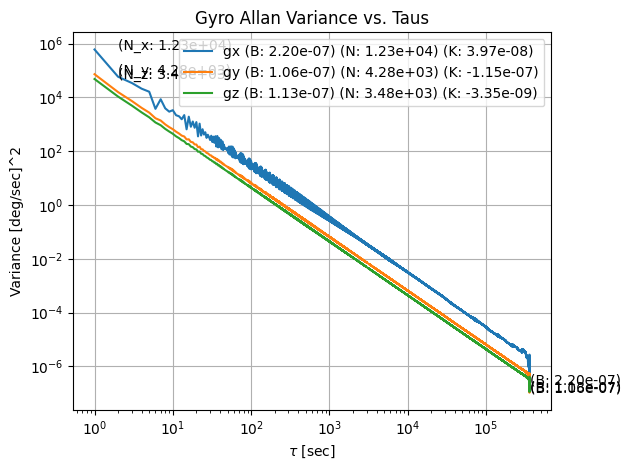

In [151]:
plt.figure
plt.title('Gyro Allan Variance vs. Taus')
plt.plot(t2_x, allan_variance_x, label=f'gx (B: {bias_instability_x:.2e}) (N: {N_x:.2e}) (K: {slope_x:.2e})')
plt.plot(t2_y, allan_variance_y, label=f'gy (B: {bias_instability_y:.2e}) (N: {N_y:.2e}) (K: {slope_y:.2e})')
plt.plot(t2_z, allan_variance_z, label =f'gz (B: {bias_instability_z:.2e}) (N: {N_z:.2e}) (K: {slope_z:.2e})')
# Annotating bias instability values on the plot (adjust position and formatting)
plt.annotate('(B: {:.2e})'.format(bias_instability_x), (t2_x[min_idx_x], allan_variance_x[min_idx_x]), xytext=(0.05, -0.05), textcoords='offset points', fontsize=10)
plt.annotate('(B: {:.2e})'.format(bias_instability_y), (t2_y[min_idx_y], allan_variance_y[min_idx_y]), xytext=(0.05, -0.05), textcoords='offset points', fontsize=10)
plt.annotate('(B: {:.2e})'.format(bias_instability_z), (t2_z[min_idx_z], allan_variance_z[min_idx_z]), xytext=(0.05, -0.05), textcoords='offset points', fontsize=10)

# Annotating angle random walk values on the plot
plt.annotate(f'(N_x: {N_x:.2e})', (t2_x[1], allan_variance_x[np.where(t2_x == T)[0][0]]), xytext=(0.05, -0.15), textcoords='offset points', fontsize=10)
plt.annotate(f'(N_y: {N_y:.2e})', (t2_y[1], allan_variance_y[np.where(t2_y == T)[0][0]]), xytext=(0.05, -0.15), textcoords='offset points', fontsize=10)
plt.annotate(f'(N_z: {N_z:.2e})', (t2_z[1], allan_variance_z[np.where(t2_z == T)[0][0]]), xytext=(0.05, -0.15), textcoords='offset points', fontsize=10)

#Annotating Rate random walk values on the plot
# plt.annotate(f'(K_x: {slope_x:.2e})', (t2_x[min_idx_x], allan_variance_x[min_idx_x]), xytext=(0.05, -0.25), textcoords='offset points', fontsize=10)
# plt.annotate(f'(K_y: {slope_y:.2e})', (t2_y[min_idx_y], allan_variance_y[min_idx_y]), xytext=(0.05, -0.25), textcoords='offset points', fontsize=10)
# plt.annotate(f'(K_z: {slope_z:.2e})', (t2_z[min_idx_z], allan_variance_z[min_idx_z]), xytext=(0.05, -0.25), textcoords='offset points', fontsize=10)

plt.xlabel(r'$\tau$ [sec]')
plt.ylabel('Variance [deg/sec]^2')
plt.grid(True)
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.savefig('Allan_variance_taus.png')
plt.tight_layout()
plt.show()